In [1]:
import sys
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
# loading the data
games=pd.read_csv('games.csv')

In [5]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
games.shape

(81312, 20)

In [7]:
# making histogram to know the corrrelation with othe r varialbles

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

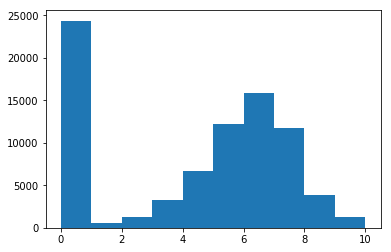

In [8]:
plt.hist(games['average_rating'])

In [11]:
games[games['average_rating']==0].iloc[5]

id                            962
type                    boardgame
name                     Contango
yearpublished                2000
minplayers                      2
maxplayers                      6
playingtime                    90
minplaytime                    90
maxplaytime                    90
minage                         10
users_rated                     0
average_rating                  0
bayes_average_rating            0
total_owners                    0
total_traders                   0
total_wanters                   0
total_wishers                   2
total_comments                  1
total_weights                   0
average_weight                  0
Name: 13127, dtype: object

In [12]:
# conclusion- these games have not been played or never reviewed. We should remove all these games from our dataset
games=games[games['average_rating']>0]

(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

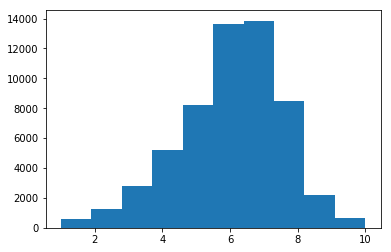

In [13]:
plt.hist(games['average_rating'])

In [15]:
games=games.dropna(axis=0)

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

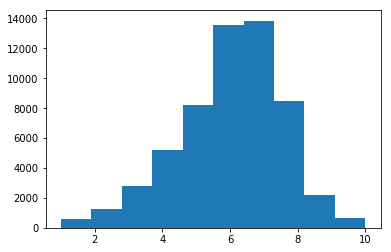

In [16]:
plt.hist(games['average_rating'])

In [17]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


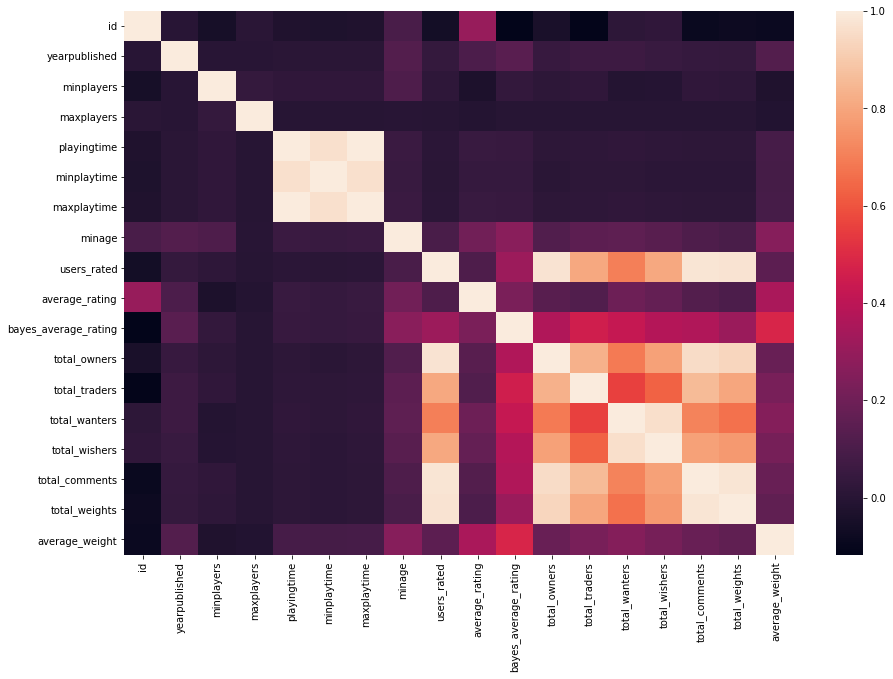

In [21]:
corr=games.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [28]:
# getting all the columns from the dataframe
columns=games.columns.tolist()
# filtering the columns to remove the data that we don't want
columns=[c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]

In [30]:
target='average_rating'

In [31]:
#generating training and test dataset
from sklearn.model_selection import train_test_split
# different way of genrating a train dataset
train=games.sample(frac=0.8,random_state=1)
# selecting anything not in the training set and putting in the test
test=games.loc[~games.index.isin(train.index)]
print(train.shape,test.shape)

(45515, 20) (11379, 20)


In [32]:
# importing the linearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initializing the model class
LR=LinearRegression()

#fitting the dat
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# generating prediction
prediction=LR.predict(test[columns])

# finding the error
mean_squared_error(prediction,test[target])

2.078819032629324

In [35]:
#importing the random forest model
from sklearn.ensemble import RandomForestRegressor

#initializing the model
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

# fitting the train set
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [37]:
prediction=RFR.predict(test[columns])
# findimg the error
mean_squared_error(test[target],prediction)

1.4458564605687358

In [38]:
# testing a example
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [40]:
#Making prediction
rating_Lr=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_rfr=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
print(rating_Lr,rating_rfr)

[8.12061283] [7.91373581]


In [42]:
test[target].iloc[0]

8.07933